# 1. Loading and Preprocessing

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print("Dataset after dropping target column:")
print(df)

Dataset after dropping target column:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


loaded the Iris dataset using sklearn.datasets.load_iris. Since this is an unsupervised clustering problem, we drop the species/target column.

# 2.Clustering Algorithm Implementation

A) KMeans Clustering

# Brief description of how KMeans clustering works.

KMeans clustering is an unsupervised learning algorithm that groups data into a specified number of clusters (K) based on feature similarity. It starts by randomly selecting K initial centroids, which act as the center of each cluster. Each data point is then assigned to the nearest centroid based on distance (typically Euclidean distance), forming K clusters. The centroids are then updated by calculating the mean of all points in each cluster. This process of assigning points and updating centroids continues iteratively until the centroids no longer change significantly or a maximum number of iterations is reached. The goal of KMeans is to minimize the variance within each cluster, effectively grouping similar data points together.

# Why KMeans is suitable for Iris Dataset

KMeans clustering is suitable for the Iris dataset because the data naturally forms distinct groups based on the measurements of flower features like petal and sepal length and width. The dataset contains three species of Iris, which correspond to three clusters, making it a good fit for KMeans, which requires specifying the number of clusters in advance. Additionally, the features in the Iris dataset are numerical and continuous, allowing KMeans to effectively use distance-based calculations (like Euclidean distance) to group similar observations. The relatively small size and low dimensionality of the dataset also make KMeans computationally efficient and easy to apply.

# Implementation & Visualization of KMeans clustering

C:\Users\AmalDev\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


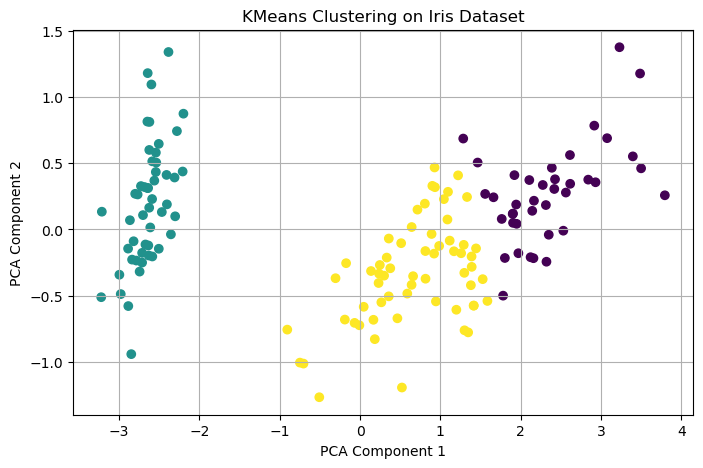

In [5]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df)

#visualization using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

# Visualize clusters
plt.figure(figsize=(8,5))
plt.scatter(df_pca[:,0], df_pca[:,1], c=kmeans_labels, cmap='viridis')
plt.title("KMeans Clustering on Iris Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

B) Hierarchical Clustering

# Brief description of how Hierarchical clustering works.

Hierarchical clustering is an unsupervised learning method that builds a hierarchy of clusters by either merging or splitting them successively. The most common approach is agglomerative clustering (bottom-up), where each data point starts as its own cluster, and pairs of clusters are gradually merged based on their similarity or distance. This process continues until all points are grouped into a single cluster or a desired number of clusters is reached. The merging decisions are based on a linkage criterion (such as single, complete, or Ward’s method), which determines the distance between clusters. The result can be visualized as a dendrogram, a tree-like diagram that shows the order and distance at which clusters are merged.

# Why Hierarchical clustering is suitable for Iris Dataset.

1.Iris dataset is small (150 samples), making it computationally feasible.

2.Allows exploration of cluster hierarchy using dendrograms.

3.Good for understanding nested relationships between data points.

# Implementation & Visualization of Hierarchical clustering

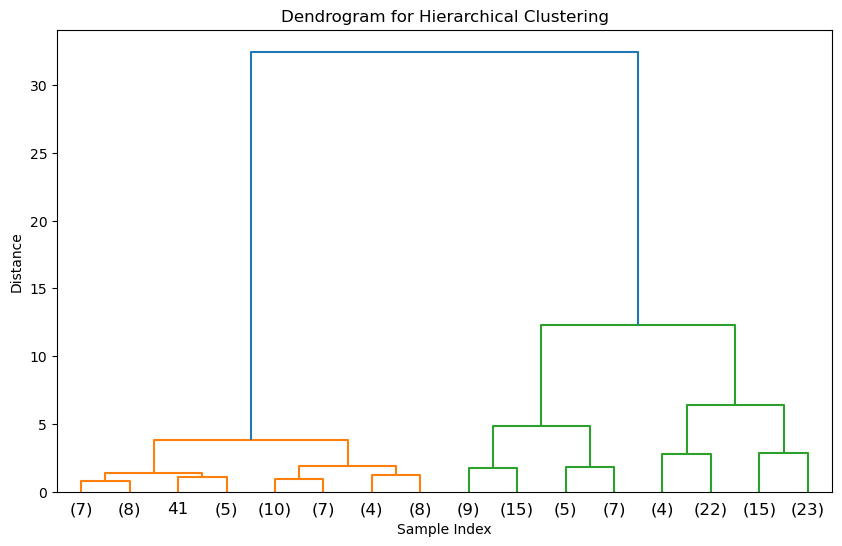

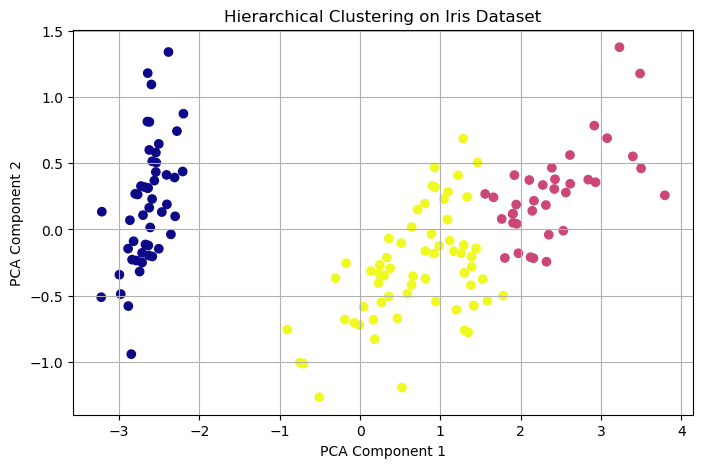

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

#linkage
linkage_matrix = linkage(df, method='ward')  # Ward minimizes variance within clusters

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Cut the dendrogram at 3 clusters
hierarchical_labels = fcluster(linkage_matrix, t=3, criterion='maxclust')

# Visualization
plt.figure(figsize=(8,5))
plt.scatter(df_pca[:,0], df_pca[:,1], c=hierarchical_labels, cmap='plasma')
plt.title("Hierarchical Clustering on Iris Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()